<a id="intro"></a>
<div style="background-color:#7E60BF; padding:10px; border-radius:8px; color:white; text-align:center; font-weight:bold; margin:0;">
    <h2 style="color:white; font-weight:bold; margin:0;">
        <span style="font-size:25px;">🍄</span>  Mushroom Classification 
    </h2>
</div>


# 🍄 Mushroom Dataset for Binary Classification

## 📝 About the Dataset
This dataset is a **cleaned version** of the original Mushroom Dataset available at the **UCI Machine Learning Repository**. It has been preprocessed using advanced cleaning techniques to enhance usability and performance for binary classification tasks.

---

### 🛠️ Cleaning Techniques Applied
- 🧹 **Modal Imputation**: Handling missing values by replacing them with the most frequent value.
- 🔄 **One-Hot Encoding**: Converting categorical variables into numerical form.
- 📊 **Z-Score Normalization**: Standardizing numerical columns.
- ✂️ **Feature Selection**: Retaining only the most important attributes.

---

## 📋 Dataset Features
The dataset includes **9 columns**:

1. **Cap Diameter** 🌐  
   - The diameter of the mushroom cap.

2. **Cap Shape** 🍂  
   - The shape of the mushroom cap.

3. **Gill Attachment** 🪶  
   - How the gills are attached to the mushroom cap.

4. **Gill Color** 🌈  
   - The color of the gills.

5. **Stem Height** 📏  
   - The height of the mushroom stem.

6. **Stem Width** 📐  
   - The width of the mushroom stem.

7. **Stem Color** 🎨  
   - The color of the mushroom stem.

8. **Season** 🗓️  
   - The season in which the mushroom is found.

9. **Target Class** 🎯  
   - Indicates if the mushroom is edible or poisonous:
     - **0**: Edible 🍽️  
     - **1**: Poisonous ☠️  

---

## 🌟 Key Highlights
- The dataset is suitable for **binary classification tasks**.  
- Pre-cleaned for easy model training and analysis.  
- Aimed at distinguishing between edible and poisonous mushrooms.

---

✨ **Happy Exploring and Modeling!** 🚀


- **About the author:** Sajjad Ali Shah
- **LinkedIn:** [LinkedIn Profile](https://www.linkedin.com/in/sajjad-ali-shah47/)
- **Dataset link:** [Mushroom Dataset (Binary Classification)](https://www.kaggle.com/datasets/prishasawhney/mushroom-dataset/data)

---

<a id="intro"></a>
<div style="background-color:#7E60BF; padding:10px; border-radius:8px; color:white; text-align:center; font-weight:bold; margin:0;">
    <h2 style="color:white; font-weight:bold; margin:0;">
        <span style="font-size:25px;">🍄</span>  Importing libraries
    </h2>
</div>


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings("ignore")

# Set visualization style
sns.set(style="whitegrid")
plt.style.use('seaborn-v0_8-pastel')

<a id="intro"></a>
<div style="background-color:#7E60BF; padding:10px; border-radius:8px; color:white; text-align:center; font-weight:bold; margin:0;">
    <h2 style="color:white; font-weight:bold; margin:0;">
        <span style="font-size:25px;">🍄</span>  Load the Dataset
    </h2>
</div>


In [3]:
# Step 1: Load the Dataset
print("Step 1: Loading Dataset...")
df = pd.read_csv("./dataset/mushroom_cleaned.csv")

Step 1: Loading Dataset...


In [7]:
# Step 2: Initial Data Exploration
print("\nStep 2: Initial Data Exploration")
print(f"Dataset Shape: {df.shape}")


Step 2: Initial Data Exploration
Dataset Shape: (54035, 9)


In [8]:
print(f"\nColumns: {df.columns.tolist()}")


Columns: ['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color', 'stem-height', 'stem-width', 'stem-color', 'season', 'class']


In [9]:
print("\nFirst 5 Rows:")
df.head()


First 5 Rows:


,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [10]:
# Check data types
print("\nData Types:")
print(df.dtypes)


Data Types:
cap-diameter         int64
cap-shape            int64
gill-attachment      int64
gill-color           int64
stem-height        float64
stem-width           int64
stem-color           int64
season             float64
class                int64
dtype: object


In [12]:
# Statistical summary
print("\nStatistical Summary:")
df.describe(include='all').T


Statistical Summary:


,count,mean,std,min,25%,50%,75%,max
cap-diameter,54035.0,567.257204,359.883763,0.000000,289.000000,525.000000,781.000000,1891.000000
cap-shape,54035.0,4.000315,2.160505,0.000000,2.000000,5.000000,6.000000,6.000000
gill-attachment,54035.0,2.142056,2.228821,0.000000,0.000000,1.000000,4.000000,6.000000
gill-color,54035.0,7.329509,3.200266,0.000000,5.000000,8.000000,10.000000,11.000000
stem-height,54035.0,0.759110,0.650969,0.000426,0.270997,0.593295,1.054858,3.835320
stem-width,54035.0,1051.081299,782.056076,0.000000,421.000000,923.000000,1523.000000,3569.000000
stem-color,54035.0,8.418062,3.262078,0.000000,6.000000,11.000000,11.000000,12.000000
season,54035.0,0.952163,0.305594,0.027372,0.888450,0.943195,0.943195,1.804273
class,54035.0,0.549181,0.497580,0.000000,0.000000,1.000000,1.000000,1.000000


In [13]:
# Step 3: Check for Missing Values
print("\nStep 3: Checking for Missing Values")
missing_values = df.isnull().sum()
print(missing_values)
print(f"Total missing values: {missing_values.sum()}")


Step 3: Checking for Missing Values
cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64
Total missing values: 0


In [14]:
# Step 4: Check for Duplicates
print("\nStep 4: Checking for Duplicates")
duplicates = df.duplicated().sum()
print(f"Number of Duplicates: {duplicates}")
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Duplicates Removed. New Shape: {df.shape}")



Step 4: Checking for Duplicates
Number of Duplicates: 303
Duplicates Removed. New Shape: (53732, 9)


In [17]:
# Drop the Duplicates data 
print("Dropping Duplicates")
duplicates = df.duplicated().sum()
print(f"Number of Duplicates: {duplicates}")
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Duplicates Removed. New Shape: {df.shape}")
    

Dropping Duplicates
Number of Duplicates: 0


<a id="intro"></a>
<div style="background-color:#7E60BF; padding:10px; border-radius:8px; color:white; text-align:center; font-weight:bold; margin:0;">
    <h2 style="color:white; font-weight:bold; margin:0;">
        <span style="font-size:25px;">🍄</span>  Exploratory Data Analysis and Visualizations
    </h2>
</div>


In [18]:
# Step 5: Exploratory Data Analysis and Visualizations
print("\nStep 5: Exploratory Data Analysis and Visualizations")


Step 5: Exploratory Data Analysis and Visualizations


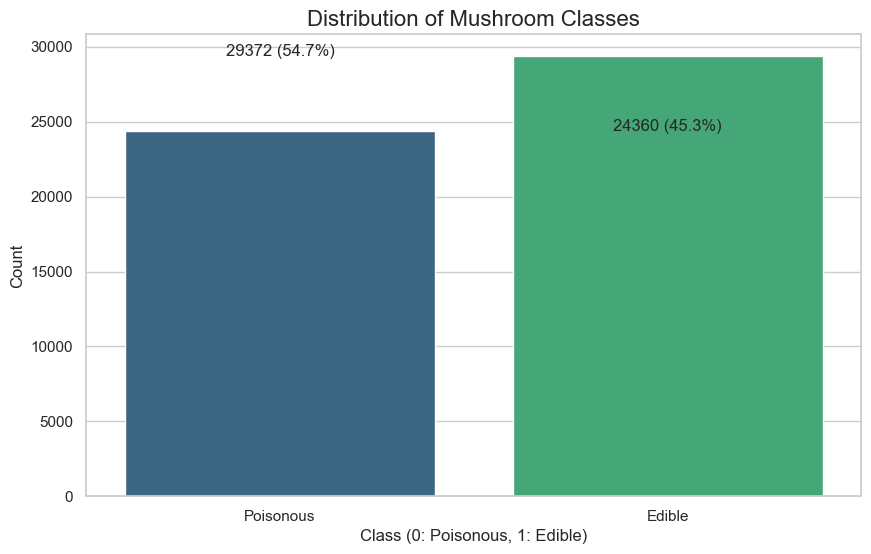

In [21]:
# Class distribution
plt.figure(figsize=(10, 6))
class_counts = df['class'].value_counts()
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Distribution of Mushroom Classes', fontsize=16)
plt.xlabel('Class (0: Poisonous, 1: Edible)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['Poisonous', 'Edible'])
for i, v in enumerate(class_counts):
    plt.text(i, v + 50, f'{v} ({v/len(df):.1%})', ha='center', fontsize=12)
plt.savefig('class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

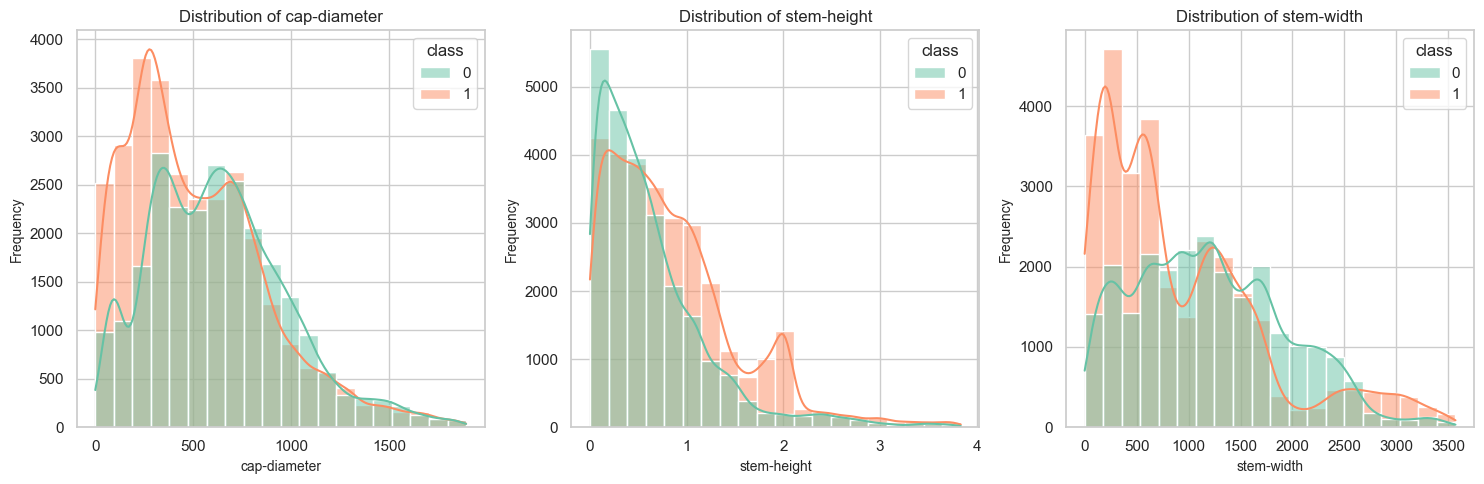

In [22]:
# Numerical features distribution
plt.figure(figsize=(15, 5))
numerical_cols = ['cap-diameter', 'stem-height', 'stem-width']
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data=df, x=col, hue='class', kde=True, bins=20, palette='Set2')
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
plt.tight_layout()
# plt.savefig('numerical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

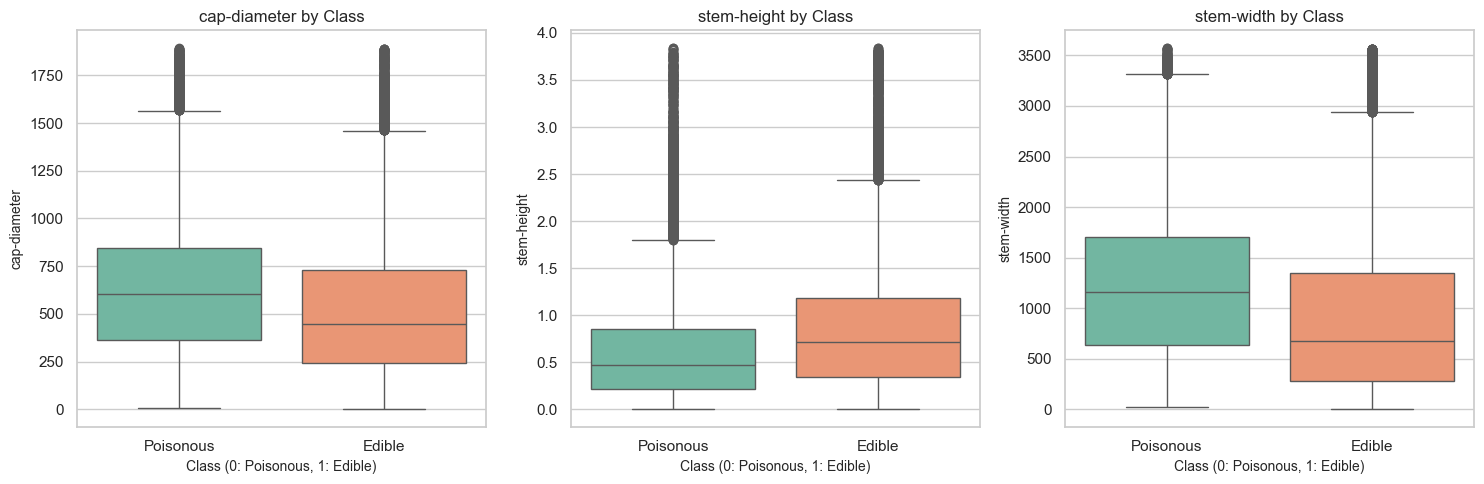

In [23]:
# Boxplot for numerical features by class
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='class', y=col, data=df, palette='Set2')
    plt.title(f'{col} by Class', fontsize=12)
    plt.xlabel('Class (0: Poisonous, 1: Edible)', fontsize=10)
    plt.ylabel(col, fontsize=10)
    plt.xticks([0, 1], ['Poisonous', 'Edible'])
plt.tight_layout()
plt.savefig('numerical_boxplots_by_class.png', dpi=300, bbox_inches='tight')
plt.show()

In [24]:
# Categorical features distribution
categorical_cols = ['cap-shape', 'gill-attachment', 'gill-color', 'stem-color', 'season']

In [25]:
# Function to create catplot for each categorical feature
def plot_categorical_feature(feature):
    plt.figure(figsize=(12, 6))
    feature_counts = df.groupby(['class', feature]).size().unstack(level=0)
    feature_counts.plot(kind='bar', stacked=True, colormap='Set2')
    plt.title(f'Distribution of {feature} by Class', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.legend(['Poisonous', 'Edible'])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'{feature}_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()

<Figure size 1200x600 with 0 Axes>

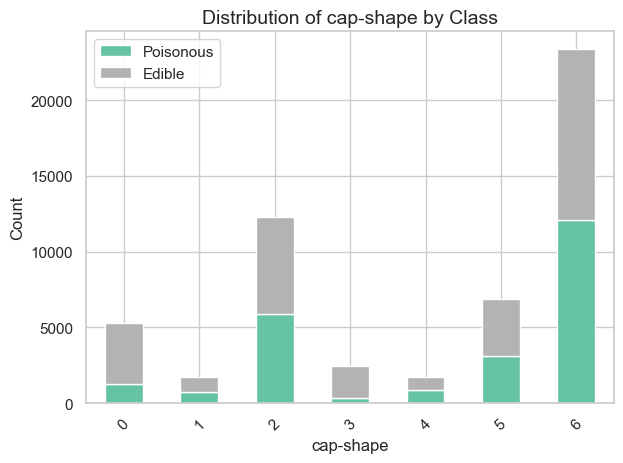

<Figure size 1200x600 with 0 Axes>

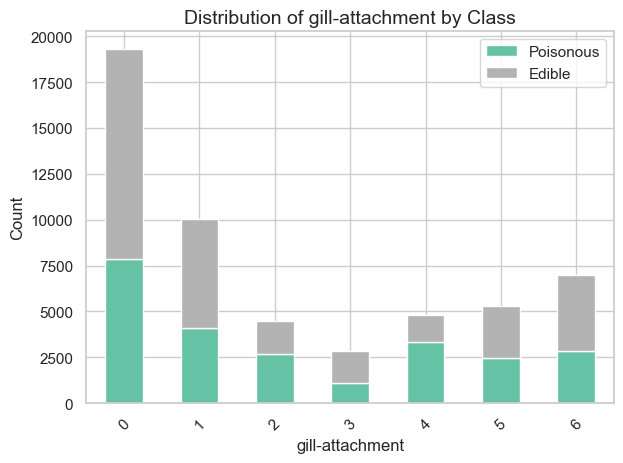

<Figure size 1200x600 with 0 Axes>

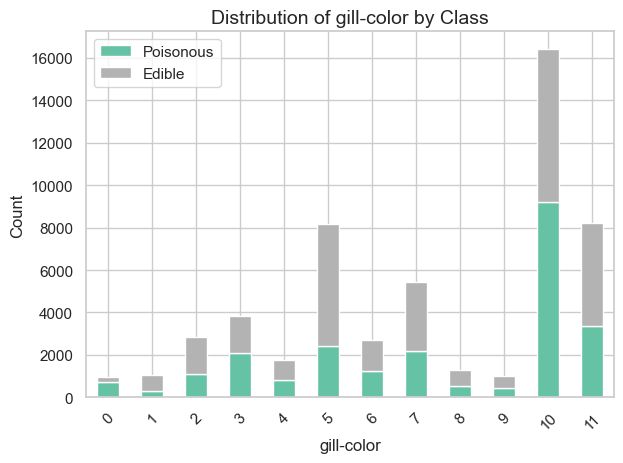

<Figure size 1200x600 with 0 Axes>

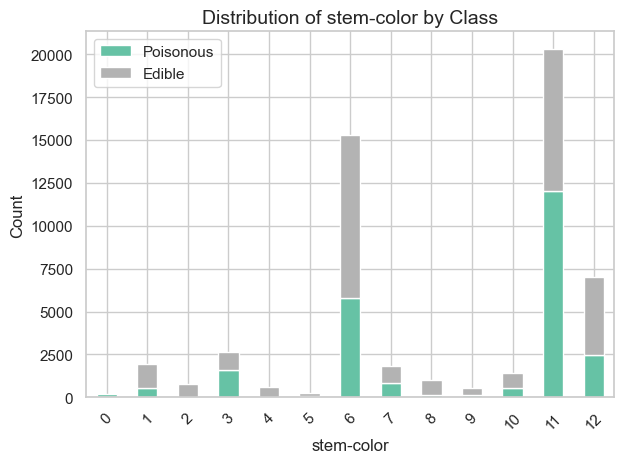

<Figure size 1200x600 with 0 Axes>

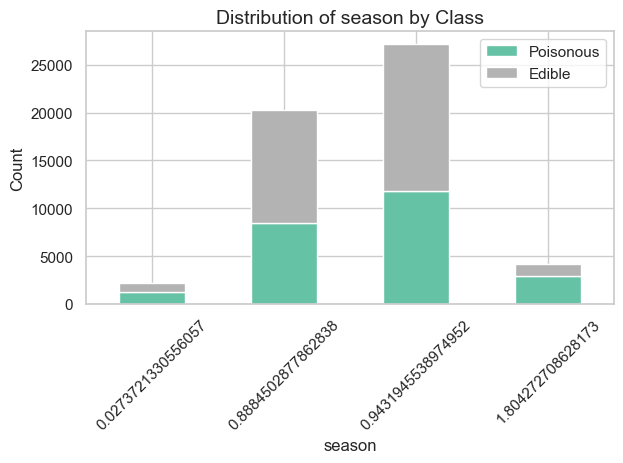

In [26]:
# Create plots for each categorical feature
for col in categorical_cols:
    plot_categorical_feature(col)

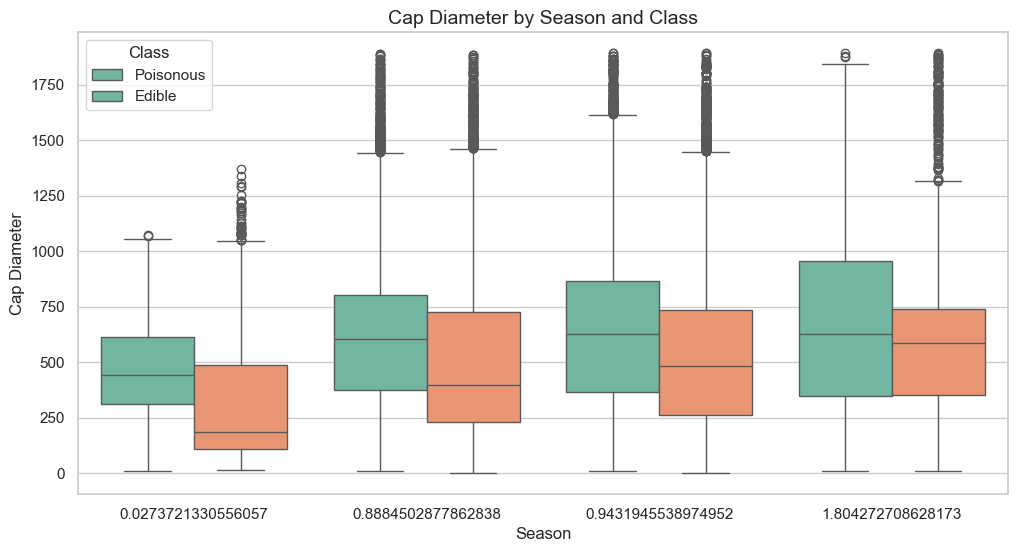

In [27]:
# Boxplot for Cap Diameter by Season
plt.figure(figsize=(12, 6))
sns.boxplot(x='season', y='cap-diameter', hue='class', data=df, palette='Set2')
plt.title('Cap Diameter by Season and Class', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Cap Diameter', fontsize=12)
plt.legend(title='Class', labels=['Poisonous', 'Edible'])
plt.savefig('cap_diameter_by_season_class.png', dpi=300, bbox_inches='tight')
plt.show()

<a id="intro"></a>
<div style="background-color:#7E60BF; padding:10px; border-radius:8px; color:white; text-align:center; font-weight:bold; margin:0;">
    <h2 style="color:white; font-weight:bold; margin:0;">
        <span style="font-size:25px;">🍄</span>  Feature Engineering
    </h2>
</div>


In [28]:
# Step 6: Feature Engineering
print("\nStep 6: Feature Engineering")

# Make a copy of the original dataframe before encoding to save the schema
df_original = df.copy()


Step 6: Feature Engineering


In [29]:
# Convert categorical columns to numerical using one-hot encoding
print(f"Categorical columns before encoding: {categorical_cols}")
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=False)

Categorical columns before encoding: ['cap-shape', 'gill-attachment', 'gill-color', 'stem-color', 'season']


In [30]:
# Important: Save the column names after encoding
encoded_feature_names = df_encoded.columns.tolist()
joblib.dump(encoded_feature_names, 'feature_names.joblib')
print(f"Encoded feature names saved as 'feature_names.joblib'")
print(f"Number of features after encoding: {len(encoded_feature_names)}")

Encoded feature names saved as 'feature_names.joblib'
Number of features after encoding: 47


<a id="intro"></a>
<div style="background-color:#7E60BF; padding:10px; border-radius:8px; color:white; text-align:center; font-weight:bold; margin:0;">
    <h2 style="color:white; font-weight:bold; margin:0;">
        <span style="font-size:25px;">🍄</span>  Outlier Detection and Handling
    </h2>
</div>



Step 7: Outlier Detection and Handling


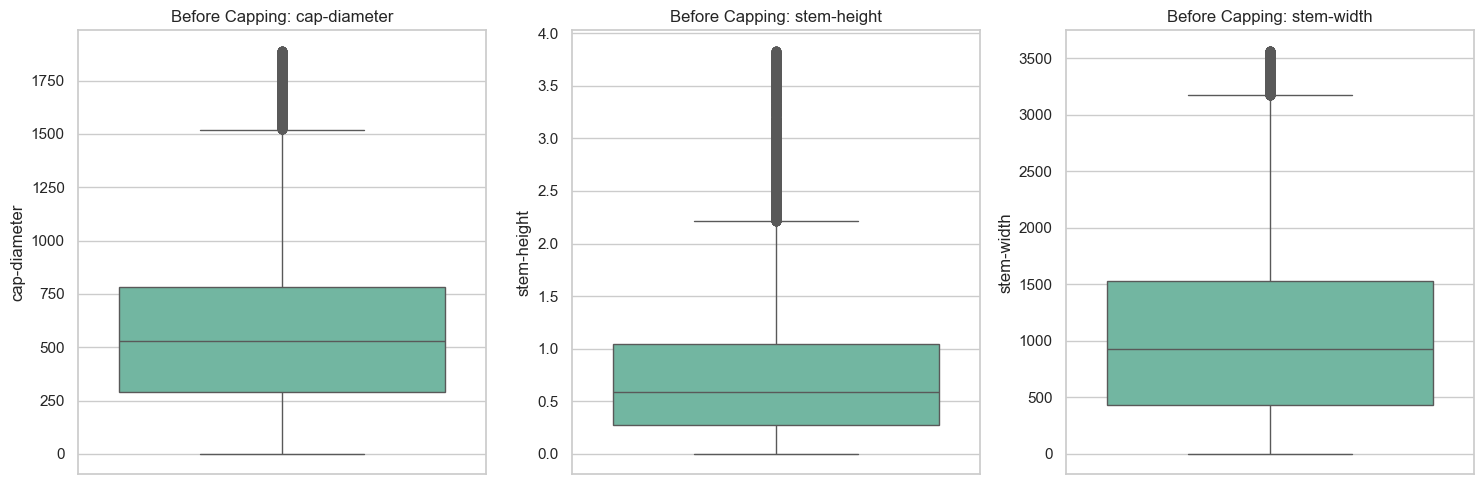

In [31]:
# Step 7: Outlier Detection and Handling
print("\nStep 7: Outlier Detection and Handling")

# Visualize distributions before capping
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df_encoded[col], palette='Set2')
    plt.title(f'Before Capping: {col}', fontsize=12)
plt.tight_layout()
# plt.savefig('before_capping_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

In [32]:
# Cap outliers at z-score threshold of 3
df_no_outliers = df_encoded.copy()
for col in numerical_cols:
    z_scores = np.abs(stats.zscore(df_no_outliers[col]))
    threshold = 3
    # Calculate upper and lower bounds
    upper_bound = df_no_outliers[col].mean() + threshold * df_no_outliers[col].std()
    lower_bound = df_no_outliers[col].mean() - threshold * df_no_outliers[col].std()
    # Cap values
    df_no_outliers[col] = df_no_outliers[col].clip(lower=lower_bound, upper=upper_bound)

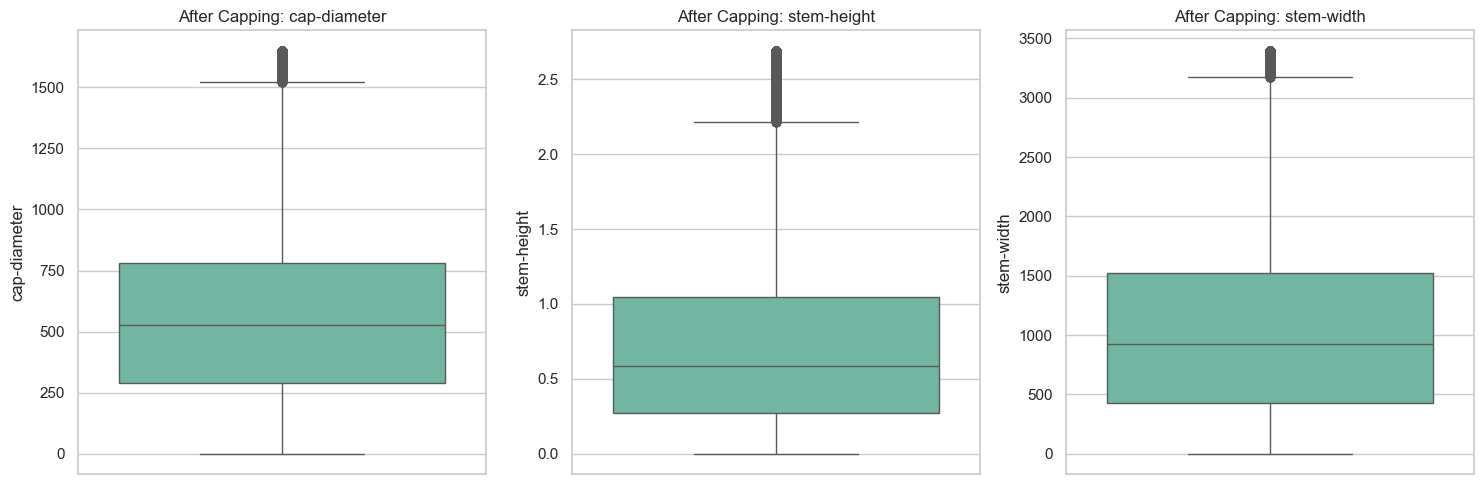

In [33]:
# Visualize distributions after capping
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df_no_outliers[col], palette='Set2')
    plt.title(f'After Capping: {col}', fontsize=12)
plt.tight_layout()
plt.savefig('after_capping_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()


Step 8: Correlation Analysis


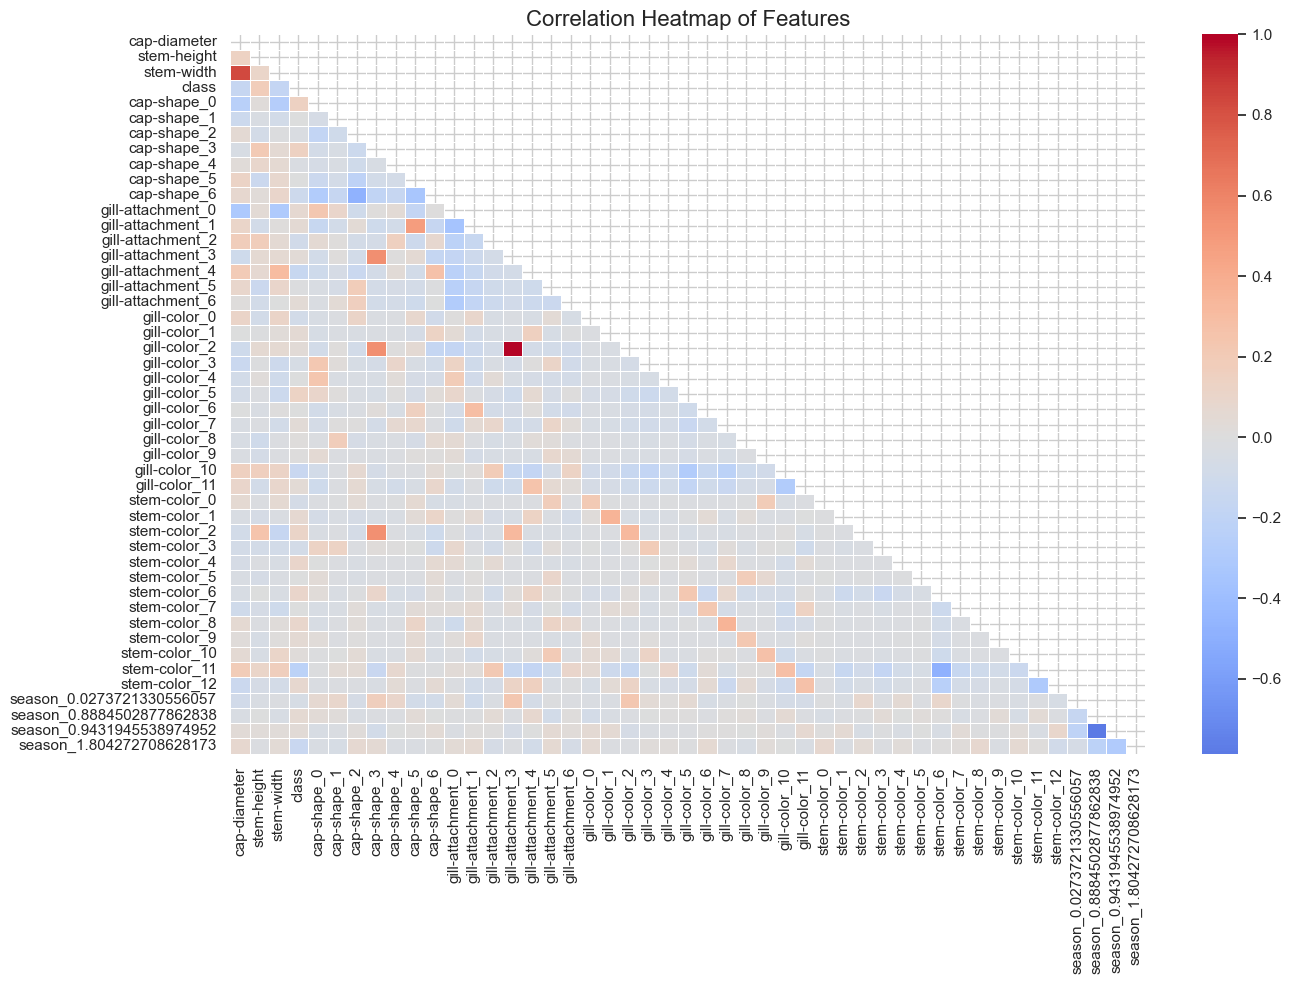

In [35]:
# Step 8: Correlation Analysis
print("\nStep 8: Correlation Analysis")

# Create a correlation matrix and visualize
plt.figure(figsize=(14, 10))
correlation_matrix = df_no_outliers.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=False, cmap='coolwarm', center=0, linewidths=.5)
plt.title('Correlation Heatmap of Features', fontsize=16)
plt.tight_layout()
# plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

<a id="intro"></a>
<div style="background-color:#7E60BF; padding:10px; border-radius:8px; color:white; text-align:center; font-weight:bold; margin:0;">
    <h2 style="color:white; font-weight:bold; margin:0;">
        <span style="font-size:25px;">🍄</span>  Split Features and Target
    </h2>
</div>


In [36]:
# Step 9: Split Features and Target
print("\nStep 9: Splitting Features and Target")
X = df_no_outliers.drop('class', axis=1)
y = df_no_outliers['class']


Step 9: Splitting Features and Target


In [37]:
# Step 10: Train-Test Split
print("\nStep 10: Train-Test Split")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training Set: {X_train.shape[0]} rows")
print(f"Testing Set: {X_test.shape[0]} rows")


Step 10: Train-Test Split
Training Set: 42985 rows
Testing Set: 10747 rows


In [38]:
# Step 11: Feature Scaling
print("\nStep 11: Feature Scaling")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Data Scaled using StandardScaler")


Step 11: Feature Scaling
Data Scaled using StandardScaler


In [39]:
# Save the scaler
joblib.dump(scaler, 'standard_scaler1.joblib')
print("StandardScaler saved as 'standard_scaler.joblib'")

StandardScaler saved as 'standard_scaler.joblib'


<a id="intro"></a>
<div style="background-color:#7E60BF; padding:10px; border-radius:8px; color:white; text-align:center; font-weight:bold; margin:0;">
    <h2 style="color:white; font-weight:bold; margin:0;">
        <span style="font-size:25px;">🍄</span>  Model Training and Evaluation
    </h2>
</div>


In [41]:
# Step 12: Model Training and Evaluation
print("\nStep 12: Model Training and Evaluation")

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}


Step 12: Model Training and Evaluation



Training Logistic Regression...
Logistic Regression Accuracy: 0.7505
Logistic Regression Cross-Validation Accuracy: 0.7479 ± 0.0065

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.72      0.72      4872
           1       0.77      0.77      0.77      5875

    accuracy                           0.75     10747
   macro avg       0.75      0.75      0.75     10747
weighted avg       0.75      0.75      0.75     10747



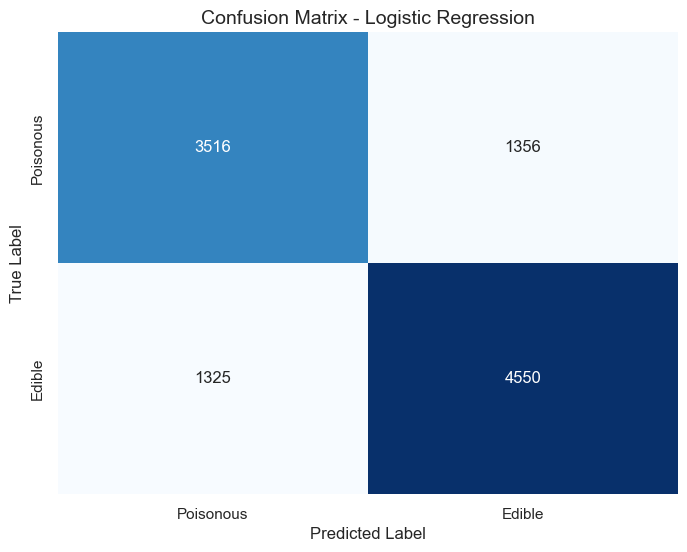

Model saved as 'logistic_regression_model.joblib'

Training Random Forest...
Random Forest Accuracy: 0.9906
Random Forest Cross-Validation Accuracy: 0.9906 ± 0.0008

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4872
           1       0.99      0.99      0.99      5875

    accuracy                           0.99     10747
   macro avg       0.99      0.99      0.99     10747
weighted avg       0.99      0.99      0.99     10747



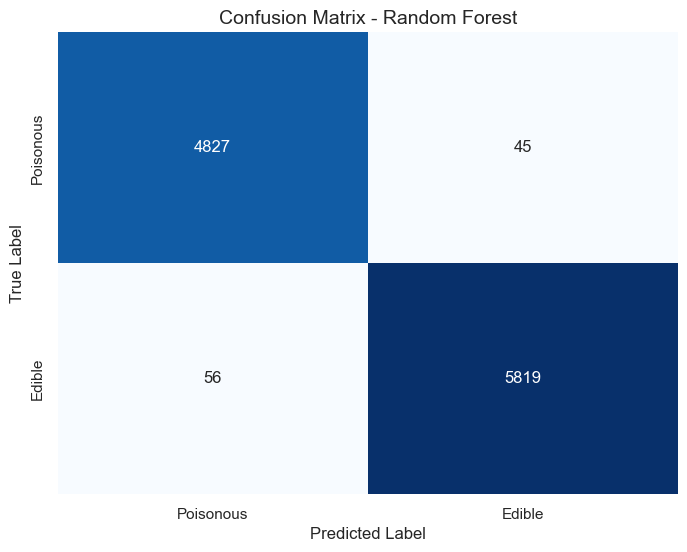

Model saved as 'random_forest_model.joblib'

Training Gradient Boosting...
Gradient Boosting Accuracy: 0.8876
Gradient Boosting Cross-Validation Accuracy: 0.8912 ± 0.0037

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      4872
           1       0.90      0.89      0.90      5875

    accuracy                           0.89     10747
   macro avg       0.89      0.89      0.89     10747
weighted avg       0.89      0.89      0.89     10747



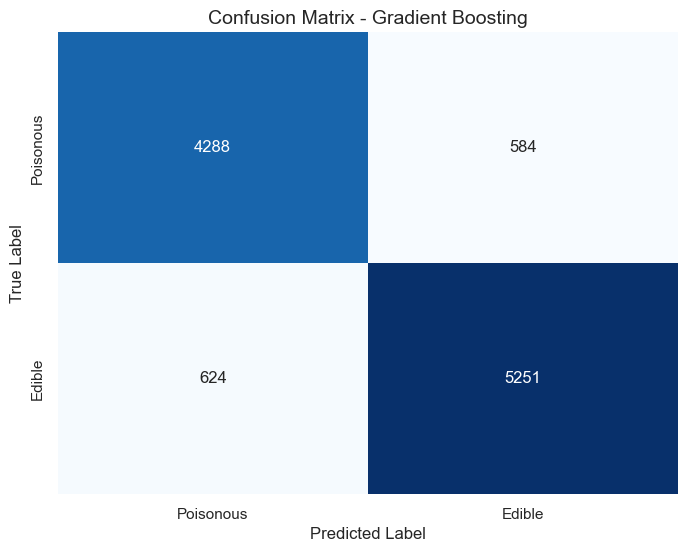

Model saved as 'gradient_boosting_model.joblib'

Training K-Nearest Neighbors...
K-Nearest Neighbors Accuracy: 0.9887
K-Nearest Neighbors Cross-Validation Accuracy: 0.9878 ± 0.0004

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4872
           1       0.99      0.99      0.99      5875

    accuracy                           0.99     10747
   macro avg       0.99      0.99      0.99     10747
weighted avg       0.99      0.99      0.99     10747



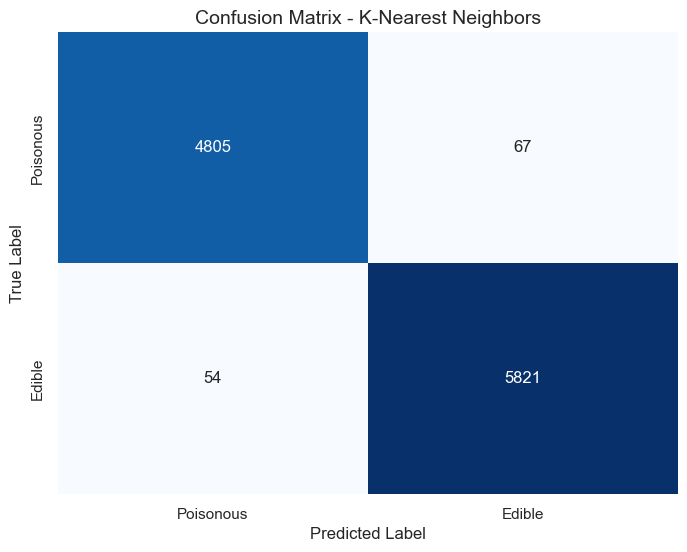

Model saved as 'k-nearest_neighbors_model.joblib'


In [42]:
# Train and evaluate models
results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Train model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    
    # Print results
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"{name} Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {name}', fontsize=14)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.xticks([0.5, 1.5], ['Poisonous', 'Edible'])
    plt.yticks([0.5, 1.5], ['Poisonous', 'Edible'])
    plt.savefig(f'confusion_matrix_{name.lower().replace(" ", "_")}.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Save the model
    joblib.dump(model, f'{name.lower().replace(" ", "_")}_model.joblib')
    print(f"Model saved as '{name.lower().replace(' ', '_')}_model.joblib'")

<a id="intro"></a>
<div style="background-color:#7E60BF; padding:10px; border-radius:8px; color:white; text-align:center; font-weight:bold; margin:0;">
    <h2 style="color:white; font-weight:bold; margin:0;">
        <span style="font-size:25px;">🍄</span>  Model Comparison
    </h2>
</div>



Step 13: Model Comparison


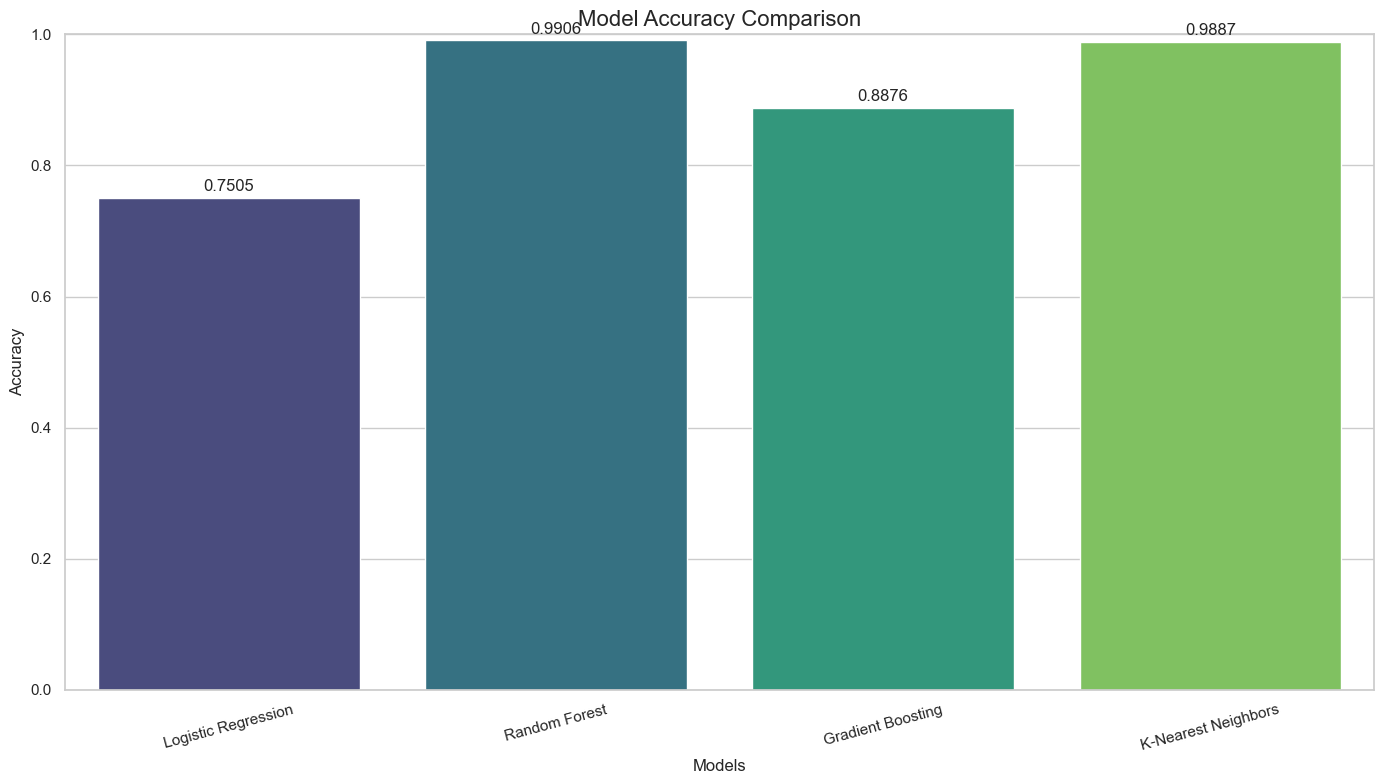

In [45]:
# Step 13: Model Comparison
print("\nStep 13: Model Comparison")
plt.figure(figsize=(14, 8))
models_names = list(results.keys())
accuracies = list(results.values())
sns.barplot(x=models_names, y=accuracies, palette='viridis')
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1)
plt.xticks(rotation=15)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', fontsize=12)
plt.tight_layout()
# plt.savefig('model_accuracy_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

In [46]:
# Identify the best model
best_model_name = max(results, key=results.get)
best_model_accuracy = results[best_model_name]
print(f"\nBest Model: {best_model_name} with accuracy: {best_model_accuracy:.4f}")

print("\nAnalysis complete! All models, scalers, and feature names have been saved.")
print("These files will be used by the Streamlit app.")


Best Model: Random Forest with accuracy: 0.9906

Analysis complete! All models, scalers, and feature names have been saved.
These files will be used by the Streamlit app.


<a id="intro"></a>
<div style="background-color:#7E60BF; padding:10px; border-radius:8px; color:white; text-align:center; font-weight:bold; margin:0;">
    <h2 style="color:white; font-weight:bold; margin:0;">
        <span style="font-size:25px;">🍄</span>  End
    </h2>
</div>
